In [7]:
# Install required packages in the current kernel (fixes ModuleNotFoundError for sklearn/imblearn)
%pip install -U scikit-learn imbalanced-learn

import pandas as pd
import numpy as np

# sklearn imports with a fallback in case the kernel didn't pick up the freshly installed packages.
# Note: Running this cell will install packages in the current kernel. If imports still fail,
# re-run the cell or restart the kernel.
try:
	from sklearn.ensemble import RandomForestClassifier, VotingClassifier
	from sklearn.metrics import classification_report, accuracy_score
	from sklearn.model_selection import train_test_split
	from sklearn.pipeline import Pipeline
	from sklearn.compose import ColumnTransformer
	from sklearn.decomposition import PCA
	from sklearn.preprocessing import LabelEncoder, StandardScaler
except ModuleNotFoundError:
	%pip install -U scikit-learn
	from sklearn.ensemble import RandomForestClassifier, VotingClassifier
	from sklearn.metrics import classification_report, accuracy_score
	from sklearn.model_selection import train_test_split
	from sklearn.pipeline import Pipeline
	from sklearn.compose import ColumnTransformer
	from sklearn.decomposition import PCA
	from sklearn.preprocessing import LabelEncoder, StandardScaler

# imblearn BalancedRandomForest with fallback
try:
	from imblearn.ensemble import BalancedRandomForestClassifier
except ModuleNotFoundError:
	%pip install -U imbalanced-learn
	from imblearn.ensemble import BalancedRandomForestClassifier

Note: you may need to restart the kernel to use updated packages.


e:\Semester 5\Research Project ML\fog-computing-intrusion-detection\fog-computing-intrusion-detection\.venv\Scripts\python.exe: No module named pip


Note: you may need to restart the kernel to use updated packages.


e:\Semester 5\Research Project ML\fog-computing-intrusion-detection\fog-computing-intrusion-detection\.venv\Scripts\python.exe: No module named pip


ModuleNotFoundError: No module named 'sklearn'

In [1]:
import sys
print(sys.executable)
import sklearn, imblearn
print("sklearn:", sklearn.__version__)
print("imblearn:", imblearn.__version__)

e:\Semester 5\Research Project ML\fog-computing-intrusion-detection\fog-computing-intrusion-detection\.venv\Scripts\python.exe


ModuleNotFoundError: No module named 'sklearn'

In [8]:
!{sys.executable} -m pip install --upgrade scikit-learn imbalanced-learn
# Then restart the kernel (UI action) and re-run imports

'e:\Semester' is not recognized as an internal or external command,
operable program or batch file.


# RandomForest Classifier
## Data Preprocessing :

In [3]:
!pip install --upgrade scikit-learn imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: C:\Program Files\Python312\python.exe -m pip install --upgrade pip


In [6]:
import sklearn
import imblearn
print(f"Sklearn version: {sklearn.__version__}")
print(f"Imblearn version: {imblearn.__version__}")

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# df_binary=pd.read_csv("/kaggle/input/binary-classified-ciciot-2023-dataset/EqualBinaryData_CICIoT_2023 (1).csv")
# df_multi_class=pd.read_csv("/kaggle/input/classwise-balanced-ciciot-2023/ClassWise_Labeled_Balanced_Dataset.csv")
df_multi_class=pd.read_csv("ClassWise_Labeled_Balanced_Dataset.csv")



#### This data contains infinite values in Rate columns which cannot be handled by imputer so we have to do it manually

In [3]:
#Binary Classification
# df=pd.DataFrame(df_binary.copy())

df=pd.DataFrame(df_multi_class)
# df=df.drop(columns=['Unnamed: 0','Number','Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 
#     'Number', 'Variance', 'Rate','ack_count', 'syn_count', 'fin_count', 'rst_count'],axis=1)
# df=df.sample(frac=1,random_state=42)
# target_values=['Mirai','Benign','DDoS']
target_values=["DDoS","Mirai","Benign"]

df=df[df['Label'].isin(target_values)]
# df=df.drop(['IPv', 'LLC', 'Tot size'],axis=1)
# df=df[['DHCP','SSH','fin_count','ICMP','Variance','fin_flag_number','DNS','rst_flag_number','rst_count','syn_count','Label']]
# df=df[[
#     'Header_Length', 'Protocol Type', 'Time_To_Live',
#     'fin_flag_number', 'syn_flag_number', 'rst_flag_number',|
#     'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number',
#     'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 
#     'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC','Label'
# ]]
# df=df.drop(columns=['Unnamed: 0','Number','Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 
#     'Number', 'Variance', 'Rate','ack_count', 'syn_count', 'fin_count', 'rst_count'],axis=1)
df['Label'].value_counts()
df.columns

Index(['Unnamed: 0', 'Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Variance', 'Label'],
      dtype='object')

In [4]:
# df=df.drop(columns=['Unnamed: 0',"Number","Unnamed: 0.1"])
# df=df.drop(columns=['Unnamed: 0'])

df=df.replace(np.inf,np.nan)
# np.isinf(df['Rate']).value_counts()
df.isnull().sum()
df=df.dropna()

In [5]:
df.isnull().sum()
# df=df.drop(columns=['Unnamed: 0.1'])


Unnamed: 0         0
Header_Length      0
Protocol Type      0
Time_To_Live       0
Rate               0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Variance           0
Label              0
dtype: int64

In [6]:
# df=df[['Label','Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate', 'ack_flag_number', 'ack_count', 'HTTPS', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Variance']]
# df=df.sample(n=100000,random_state=42).reset_index(drop=True)
df=df.sample(frac=1,random_state=42).reset_index(drop=True)
df
df['Label'].value_counts()

Label
DDoS      421222
Benign    421209
Mirai     421200
Name: count, dtype: int64

In [7]:
# Binary Classification
# attacks=df[df['Label']==1].iloc[0:10000]
# normal=df[df['Label']==0].iloc[0:50000]
# test=pd.concat([attacks,normal])
# print(test['Label'].value_counts())
# from sklearn.preprocessing import LabelEncoder
# X=test.drop('Label',axis=1)

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# y=test['Label']
# ST=StandardScaler()
# LE=LabelEncoder()
# y_encoded=LE.fit_transform(y)
# pca = PCA(n_components=1)
# X_pca = pca.fit_transform(X_scaled)

# Multi class classification

normal=df[df['Label']=='Benign']
attack=df[df['Label']!='Benign']
attack=attack.sample(n=421231,random_state=42).reset_index(drop=True)
print((attack['Label'].value_counts()))
df=pd.concat([normal,attack])
df=df.sample(frac=1,random_state=42).reset_index(drop=True)
X=df.drop('Label',axis=1)
y=df['Label']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# model = LogisticRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# X_encoded=ST.fit_transform(X_train)
# y_encoded=LE.fit_transform(y)
# 1. First Split: Separate the Final Test Set (10%)
# This X_test is your "Unseen Data" for the final report
# X_temp, X_test, y_temp, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
# x_train_encoded=ST.fit_transform(X_train)
# x_test_encoded=ST.transform(X_test)

# X_train, X_val, y_train, y_val = train_test_split(X_temp, y_train, test_size=0.111, random_state=42)

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.111, random_state=42)

# 2. Second Split: Separate Train (80%) and Validation (10%) from the remaining 90%
# 0.111 of 90% is approx 10% of the total
# y_train_encoded=LE.fit_transform(y_train)
# y_test_encoded=LE.transform(y_val)
# X_pca
df['Label'].value_counts()

Label
DDoS     210683
Mirai    210548
Name: count, dtype: int64


Label
Benign    421209
DDoS      210683
Mirai     210548
Name: count, dtype: int64

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# pipe_lr=Pipeline(
#     [
#         # ('preprocessor',preprocessor),
#         ('Lr',LogisticRegression(random_state=42,max_iter=1000)),
        
#     ]
# )

# pipe_dt = Pipeline(
#     [
#         # ('preprocessor',preprocessor),
#         ('DT',DecisionTreeClassifier(max_depth=50,max_leaf_nodes=2,min_samples_split=30,min_samples_leaf=1,random_state=42))
#     ]
# )

# pipe_rf = Pipeline(
#     [
#         # ('preprocessor',preprocessor),
#         ('rf_classifier',RandomForestClassifier(min_samples_leaf=1,min_samples_split=40,max_depth=30,n_estimators=100,random_state=42))
#     ]
# )

# voting_clf=VotingClassifier(
#     estimators=[
#         ('lr',pipe_lr),
#         ('dt',pipe_dt),
#         ('rf',pipe_rf)
#     ],
#     voting='hard'
# )

# print("Training votting classifiers:")
# voting_clf.fit(x_train_encoded,y_train)
# y_pre=voting_clf.predict(x_test_encoded)

# print("VotingClassifier Accuracy:",accuracy_score(y_test,y_pre))
# print("Classification report:\n",classification_report(y_test,y_pre))

In [ ]:


# 2. Second Split: Separate Train (80%) and Validation (10%) from the remaining 90%
# 0.111 of 90% is approx 10% of the total


# RF=RandomForestClassifier(max_depth=30,min_samples_split=5,n_estimators=50,random_state=42)
RF=RandomForestClassifier(
    n_estimators=30,          
    criterion='entropy',      
    max_depth=None,             
    min_samples_split=20,        
    min_samples_leaf=2, 
    bootstrap=True,
    random_state=42,
    n_jobs=-1                  
)

RF.fit(X_train,y_train)
y_pred=RF.predict(X_val)
print("Accuracy:",accuracy_score(y_val,y_pred))
# y_pred_back=LE.inverse_transform(y_pred)
# y_val_back=LE.inverse_transform(y_val)

print("Classification Report:\n",classification_report(y_val,y_pred))


## ISSUE:
### In this when we decrease the number of 1=intrusions data and increase the Normal data then accuracy is increased and if we do exactly opposite of this accuracy decreases why?
### with equal number of 1 and 0 we get maximum of 93% accuracy

In randomforest the best accuracy we got with 3 classes is 94-95% and even adding one more class decrease the accuarcy drastically to 80% due to so overlapping of features of different classes

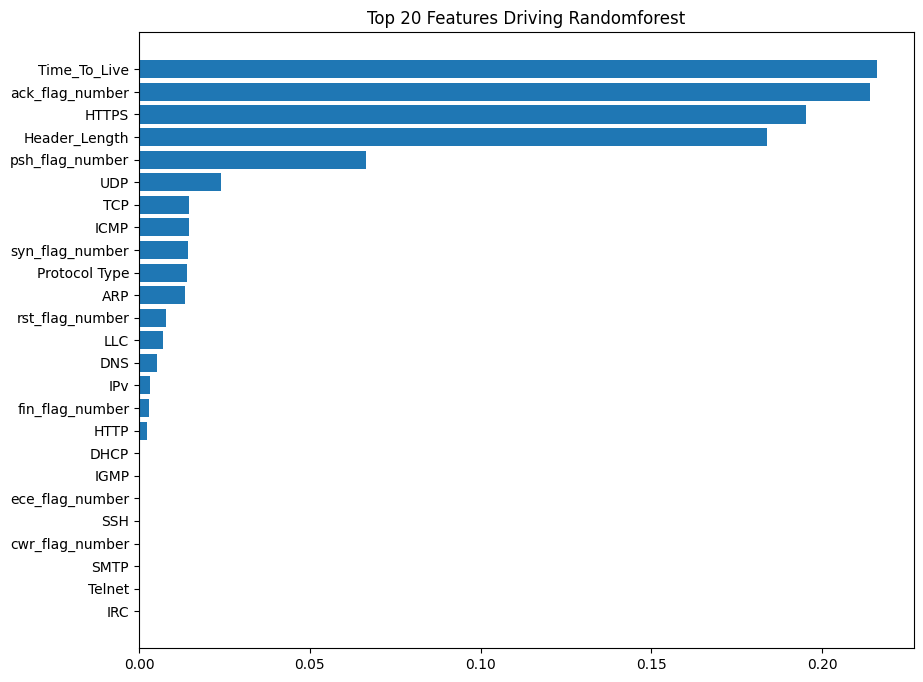

In [51]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load your trained model
# clf = joblib.load("decision_tree_model.joblib")

# Get feature importances
importances = RF.feature_importances_
feature_names = X_train.columns # Make sure X_train is a DataFrame, not numpy array

# Sort and Plot
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_imp_df['Feature'][:42], feature_imp_df['Importance'][:42])
plt.gca().invert_yaxis()
plt.title("Top 20 Features Driving Randomforest")
plt.show()

In [1]:
train_preds=RF.predict(X_train)
test_preds=RF.predict(X_test)
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Difference:        {train_acc - test_acc:.4f}")

if train_acc > 0.99 and (train_acc - test_acc) > 0.05:
    print("\nDIAGNOSIS: High probability of OVERFITTING.")
elif train_acc < 0.80:
    print("\nDIAGNOSIS: Likely UNDERFITTING (Model is too simple).")
else:
    print("\nDIAGNOSIS: Good Fit (Generalized well).")

Training Accuracy: 0.9613
Testing Accuracy:  0.9610
Difference:        0.0002

DIAGNOSIS: Good Fit (Generalized well).


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.model_selection import learning_curve

# def plot_learning_curve(estimator, X, y):
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=5, n_jobs=-1, 
#         train_sizes=np.linspace(0.1, 1.0, 5) # Check at 10%, 30%, ... 100% of data
#     )
    
#     # Calculate means
#     train_mean = np.mean(train_scores, axis=1)
#     test_mean = np.mean(test_scores, axis=1)

#     plt.figure(figsize=(10, 6))
#     plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
#     plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")
    
#     plt.title("Learning Curve: Decision Tree")
#     plt.xlabel("Training Examples")
#     plt.ylabel("Accuracy")
#     plt.legend(loc="best")
#     plt.grid()
#     plt.show()


# plot_learning_curve(RF, X, y)

In [ ]:
# import time
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],      # Fewer trees = faster/lighter
#     'max_depth': [10, 20, None],         # Limit depth to prevent overfitting/bloat
#     'min_samples_split': [2, 5, 10],     # Higher numbers = simpler trees
#     'min_samples_leaf': [1, 2, 4],       # Higher numbers = simpler trees
#     'bootstrap': [True]                  # Standard for Random Forest
# }

# # --- 2. Initialize the Model ---
# rf = RandomForestClassifier(
#     random_state=42, 
#     class_weight='balanced',  # Critical for multi-class balance
#     n_jobs=-1                 # Use all cores for the base estimator
# )

# # --- 3. Setup Grid Search ---
# # cv=3 is usually enough for large datasets (saves time vs cv=5)
# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=3,                         # 3-Fold Cross Validation
#     n_jobs=-1,                    # Use all CPU cores for the Search
#     verbose=2,                    # Print progress updates
#     scoring='f1_weighted'         # Optimize for F1 Score (better for imbalance than accuracy)
# )

# # --- 4. Run Search ---
# start_time = time.time()
# grid_search.fit(X_train, y_train)
# end_time = time.time()

# print("\n" + "="*40)
# print(f"GRID SEARCH RESULTS")
# print(f"Time Taken: {(end_time - start_time)/60:.2f} minutes")
# print("="*40)

# # Best Parameters
# print(f"Best Parameters found: {grid_search.best_params_}")
# print(f"Best Cross-Validation F1-Score: {grid_search.best_score_:.4f}")

# # --- 5. Evaluate Best Model on Test Set ---
# best_rf = grid_search.best_estimator_

# print("\n--- Final Evaluation on Test Set ---")
# y_pred = best_rf.predict(X_test)

# print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

GridSearch result on binary data:

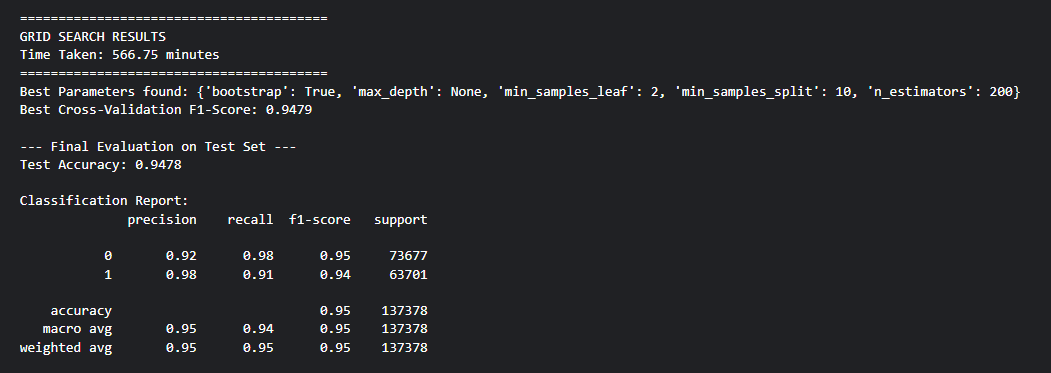

In [ ]:
pip install --upgrade scikit-learn imbalanced-learn

<h1>Final Results</h1>
<h2>Random Forest Classifier classification report of Multiclass Classification</h2>

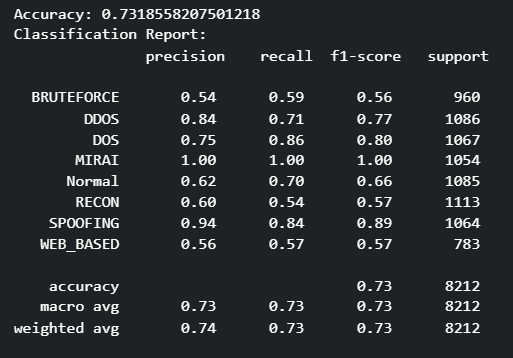

<h2>GridSearch result on binary data </h2>

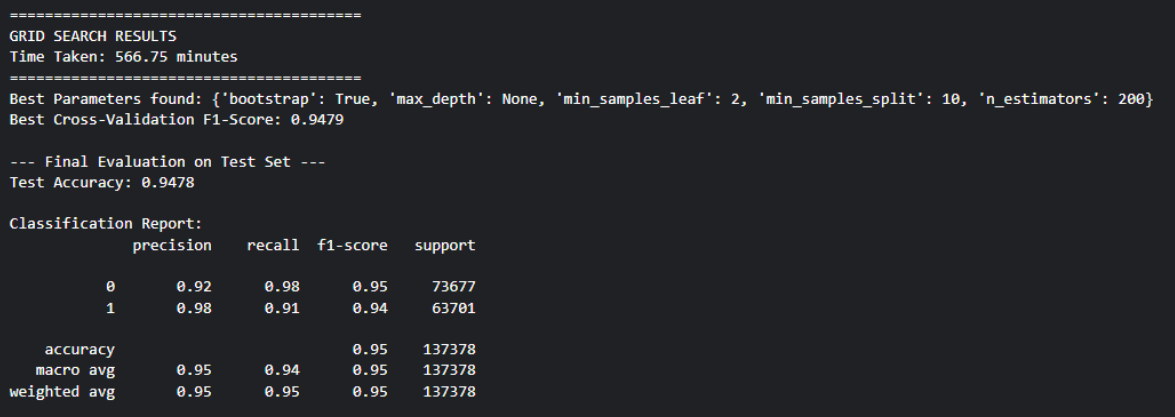

In [ ]:
# joblib.dump(RF,"/kaggle/working/MultiClass_RF_99%.joblib")

In [ ]:
!pip install micromlgen
from micromlgen import port

In [ ]:
# #Model with real packet features
# # print(f"Micro Model Accuracy: {RF.score(x_test_encoded, y_test)}")

# c_code = port(RF)

# with open('RF_BinaryClassifier_96%_rea_features_less_recall_of_1.h', 'w') as f:
#     f.write(c_code)

# print("Model exported to random_forest_model.h")

In [ ]:
# test=pd.DataFrame(y_test)
# X_test
# X_test.to_csv("x_testing.csv",index=False)
# test.to_csv("y_testing.csv",index=False)
# X_test.reset_index(drop=True)


In [ ]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(5,4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
# y_numeric = pd.factorize(y)[0]

# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
# plt.xlabel('Original Feature 1')
# plt.ylabel('Original Feature 2')
# plt.title('Before PCA: Using First 2 Standardized Features')
# plt.colorbar(label='Target classes')

# plt.subplot(1, 2, 2)
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('After PCA: Projected onto 2 Principal Components')
# plt.colorbar(label='Target classes')

# plt.tight_layout()
# plt.show()

In [ ]:
# cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
# plt.axhline(y=0.95, color='r', linestyle='-', label='95% Threshold')
# plt.axhline(y=0.99, color='g', linestyle='-', label='99% Threshold')

# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Explained Variance by Components')
# plt.legend()
# plt.grid(True)
# plt.show()

# # 5. Print exact number of components needed
# n_95 = np.argmax(cumulative_variance >= 0.95) + 1
# n_99 = np.argmax(cumulative_variance >= 0.99) + 1

# print(f"Number of components to keep 95% variance: {n_95}")
# print(f"Number of components to keep 99% variance: {n_99}")

In [ ]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# #Logictic regression
# model = LogisticRegression(max_iter=2000, random_state=42,C=1,multi_class='multinomial',penalty='l2',solver='saga')
# # {'C': 1.0, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}# Increase max_iter for convergence
# param_grid = {
#     'C': [0.01, 0.1, 1.0, 10.0, 100.0], # Inverse of regularization strength
#     'penalty': ['l2', 'l1', 'elasticnet'], # Type of regularization
#     'solver': ['saga'], # 'saga' supports all penalties ('l1', 'l2', 'elasticnet', 'none')
#     'multi_class': ['multinomial'] # Use 'multinomial' for native multiclass loss (softmax)
# }

# # 3. Perform Grid Search with Cross-Validation
# # 'f1_weighted' is often a good metric for multiclass problems, especially with imbalance
# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     cv=5, # 5-fold cross-validation
#     scoring='f1_weighted',
#     verbose=1,
#     n_jobs=-1 # Use all available CPU cores
# )

# # Fit the GridSearchCV to the training data
# model.fit(x_train_encoded, y_train)

# # 4. View the Best Hyperparameters and Results
# # print(f"Best hyperparameters found: {grid_search.best_params_}")
# # print(f"Best cross-validation F1-weighted score: {grid_search.best_score_:.4f}")

# # 5. Evaluate the Best Model on the Test Set
# # best_model = grid_search.best_estimator_
# y_pred = model.predict(x_test_encoded)
# print("\nClassification Report on Test Data:")
# print(classification_report(y_test, y_pred))